In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
output_dir = 'D:/Thesis/files_output_dir/output_utilization/'
road_data = pd.read_csv(output_dir + 'level2_road_history_workday_utilization.csv')

In [13]:
road_data_selected= road_data[['road_id','time', 'avg_speed',
       'theta', 'volume', 'qc', 'vc', 'Uq', 'Uv', 'Uq_norm', 'Uv_norm',
       'theta_norm', 'utilization']]

# Filter the data for road_id 69753 and time in [48, 72, 108]
# filtered_data = road_data_selected[(road_data_selected['road_id'] == 69753) & (road_data_selected['time'].isin([48, 72, 108]))]
# filtered_data
road_data_selected[road_data_selected['road_id']== 69753]

,road_id,time,avg_speed,theta,volume,qc,vc,Uq,Uv,Uq_norm,Uv_norm,theta_norm,utilization
0,2,0,15.493693,0.0,7.350,20.925,9.776879,0.351254,1.584728,0.017468,0.447711,0.0,0.158886
1,2,14,5.826971,1.0,7.350,20.925,9.776879,0.351254,0.595995,0.017468,0.168378,0.5,0.173290
2,2,15,2.323774,1.0,14.775,20.925,9.776879,0.706093,0.237681,0.038729,0.067149,0.5,0.138385
3,2,32,12.130410,0.0,7.350,20.925,9.776879,0.351254,1.240724,0.017468,0.350525,0.0,0.130841
4,2,37,11.736789,0.0,7.350,20.925,9.776879,0.351254,1.200464,0.017468,0.339151,0.0,0.127464
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109074,81592,139,16.814622,0.0,20.100,20.100,14.171836,1.000000,1.186482,0.056338,0.335200,0.0,0.131817
3109075,81592,140,12.584847,0.0,13.950,20.100,14.171836,0.694030,0.888018,0.038006,0.250880,0.0,0.102946
3109076,81592,141,11.902069,0.0,13.950,20.100,14.171836,0.694030,0.839840,0.038006,0.237268,0.0,0.098615
3109077,81592,142,15.123112,0.0,20.100,20.100,14.171836,1.000000,1.067124,0.056338,0.301480,0.0,0.121641


In [5]:
# Define the time periods for morning, afternoon, and evening
morning_hours = range(8*6, 10*6)    # 8 AM to 10 AM
afternoon_hours = range(14*6, 17*6) # 2 PM to 5 PM
evening_hours = range(18*6, 20*6)   # 6 PM to 08 PM

# Create subsets for each time period
morning_data = road_data[road_data['time'].isin(morning_hours)]
afternoon_data = road_data[road_data['time'].isin(afternoon_hours)]
evening_data = road_data[road_data['time'].isin(evening_hours)]

# Aggregate the data to compute mean values for each period
morning_summary = morning_data[['Uq', 'Uv', 'Uq_norm', 'Uv_norm','theta_norm', 'utilization']].mean()
afternoon_summary = afternoon_data[['Uq', 'Uv', 'Uq_norm', 'Uv_norm','theta_norm','utilization']].mean()
evening_summary = evening_data[['Uq', 'Uv', 'Uq_norm', 'Uv_norm','theta_norm', 'utilization']].mean()

# Create a summary DataFrame to compare the results
summary_df = pd.DataFrame({
    'Period': ['Morning', 'Afternoon', 'Evening'],
    'Avg_Uq': [morning_summary['Uq'], afternoon_summary['Uq'], evening_summary['Uq']],
    'Avg_Uv': [morning_summary['Uv'], afternoon_summary['Uv'], evening_summary['Uv']],
    'Avg_Uq_norm': [morning_summary['Uq_norm'], afternoon_summary['Uq_norm'], evening_summary['Uq_norm']],
    'Avg_Uv_norm': [morning_summary['Uv_norm'], afternoon_summary['Uv_norm'], evening_summary['Uv_norm']],
    'Avg_theta_norm': [morning_summary['theta_norm'], afternoon_summary['theta_norm'], evening_summary['theta_norm']],
    'Avg_Utilization': [morning_summary['utilization'], afternoon_summary['utilization'], evening_summary['utilization']]
})


In [6]:
summary_df

,Period,Avg_Uq,Avg_Uv,Avg_Uq_norm,Avg_Uv_norm,Avg_theta_norm,Avg_Utilization
0,Morning,0.682871,0.872364,0.037337,0.246457,0.622939,0.225936
1,Afternoon,0.609984,0.904982,0.032970,0.255672,0.614672,0.226743
2,Evening,0.727240,0.856638,0.039996,0.242014,0.618862,0.224288


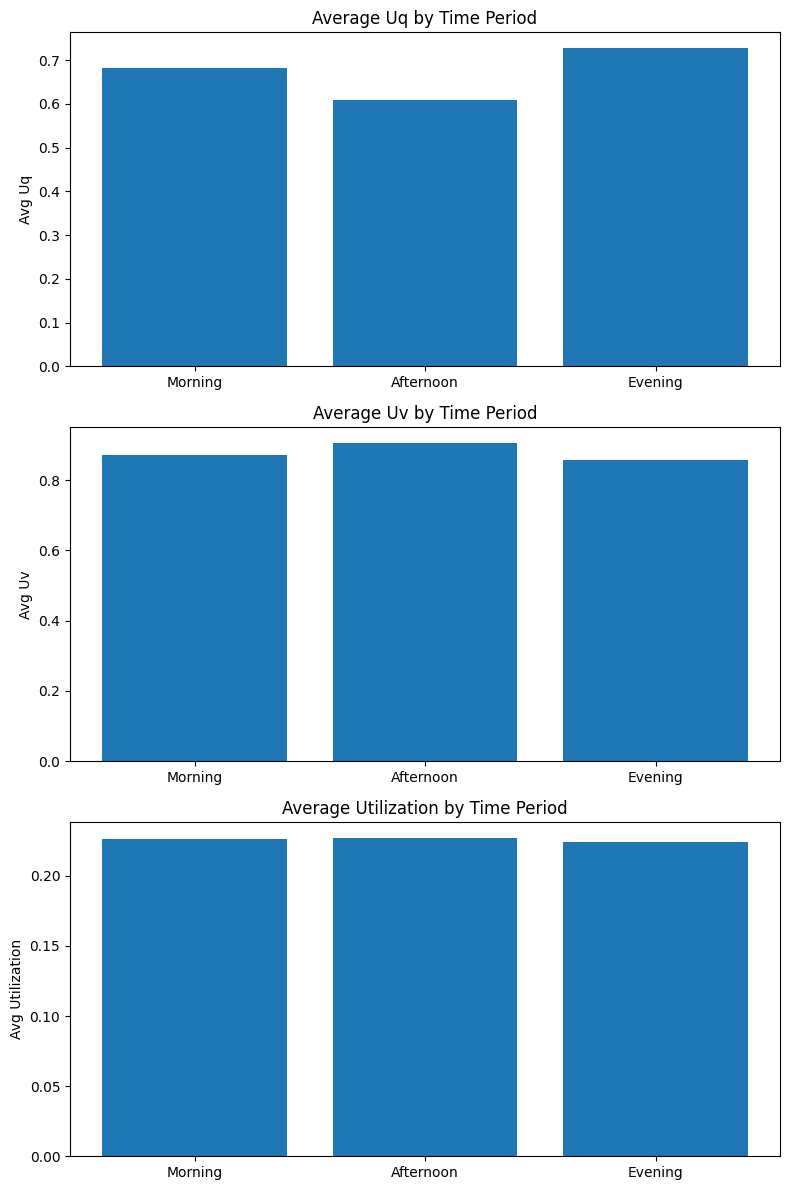

In [7]:


# Set up the figure and axes
fig, ax = plt.subplots(3, 1, figsize=(8, 12))

# Plot Avg_Uq
ax[0].bar(summary_df['Period'], summary_df['Avg_Uq'])
ax[0].set_title('Average Uq by Time Period')
ax[0].set_ylabel('Avg Uq')

# Plot Avg_Uv
ax[1].bar(summary_df['Period'], summary_df['Avg_Uv'])
ax[1].set_title('Average Uv by Time Period')
ax[1].set_ylabel('Avg Uv')

# Plot Avg_Utilization
ax[2].bar(summary_df['Period'], summary_df['Avg_Utilization'])
ax[2].set_title('Average Utilization by Time Period')
ax[2].set_ylabel('Avg Utilization')

# Adjust layout
plt.tight_layout()
plt.show()

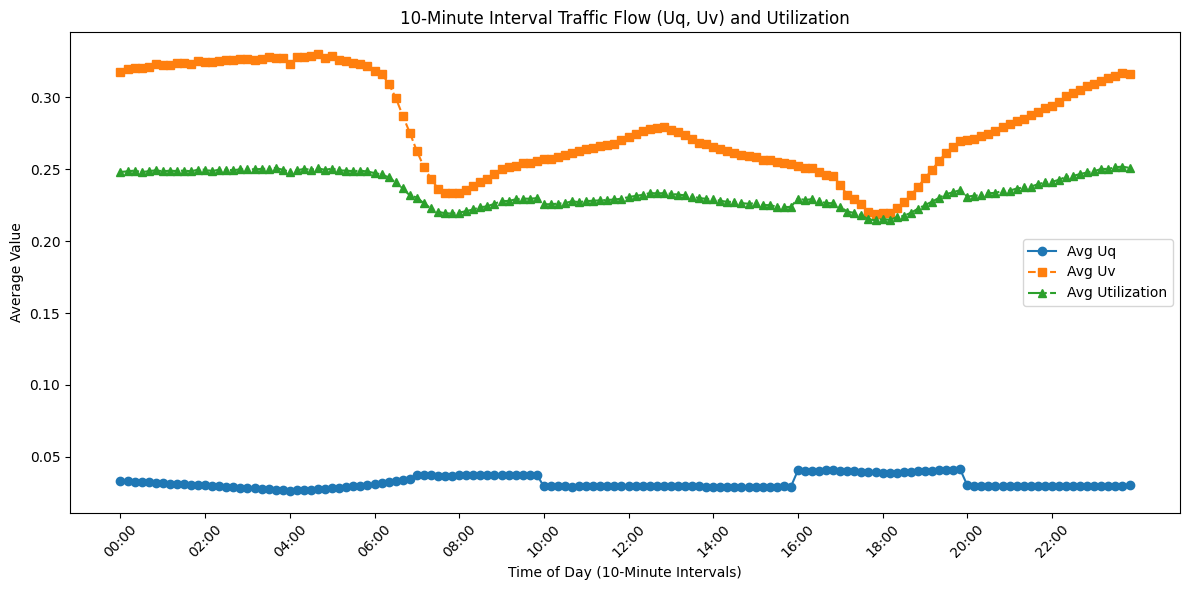

In [8]:
# Grouping the data by time to compute the average Uq, Uv, and utilization for each hour
hourly_summary = road_data.groupby('time')[['Uq_norm', 'Uv_norm', 'utilization']].mean().reset_index()

# Convert 10-minute intervals into readable time format (00:00, 00:10, ..., 23:50)
hour_labels = [(f"{int(t//6):02}:{(t%6)*10:02}") for t in hourly_summary['time']]

# Plotting the hourly Uq, Uv, and utilization with adjusted time labels
plt.figure(figsize=(12, 6))

# Plot Uq with a circle marker
plt.plot(hourly_summary['time'], hourly_summary['Uq_norm'], marker='o', label='Avg Uq', linestyle='-')
# Plot Uv with a square marker
plt.plot(hourly_summary['time'], hourly_summary['Uv_norm'], marker='s', label='Avg Uv', linestyle='--')
# Plot Utilization with a triangle marker
plt.plot(hourly_summary['time'], hourly_summary['utilization'], marker='^', label='Avg Utilization', linestyle='-.')


# Adding labels and title
plt.title('10-Minute Interval Traffic Flow (Uq, Uv) and Utilization')
plt.xlabel('Time of Day (10-Minute Intervals)')
plt.ylabel('Average Value')

# Set custom x-axis labels
plt.xticks(hourly_summary['time'][::12], hour_labels[::12], rotation=45)  # Show every 2-hour label

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [9]:
# Step 1: Calculate the average utilization for each road segment
road_utilization = road_data.groupby('road_id')['utilization'].mean().reset_index()

# Step 2: Set thresholds for high and low utilization (e.g., top 10% and bottom 10%)
high_threshold = road_utilization['utilization'].quantile(0.9)  # Top 10%
low_threshold = road_utilization['utilization'].quantile(0.1)   # Bottom 10%

# Step 3: Identify roads with high and low utilization
high_utilization_roads = road_utilization[road_utilization['utilization'] >= high_threshold]
low_utilization_roads = road_utilization[road_utilization['utilization'] <= low_threshold]

# Display the identified road segments
print("High Utilization Roads:\n", high_utilization_roads)
print("Low Utilization Roads:\n", low_utilization_roads)


High Utilization Roads:
        road_id  utilization
56         141     0.308574
89         205     0.305944
111        258     0.418578
136        283     0.466371
158        319     0.309405
...        ...          ...
24850    81147     0.309078
24851    81148     0.311569
24871    81188     0.310221
24879    81204     0.305186
24980    81405     0.308895

[2508 rows x 2 columns]
Low Utilization Roads:
        road_id  utilization
0            2     0.143962
5           11     0.111011
8           17     0.152532
13          27     0.162854
19          35     0.114662
...        ...          ...
25071    81585     0.113299
25072    81589     0.111369
25073    81590     0.111999
25074    81591     0.124453
25075    81592     0.106514

[2508 rows x 2 columns]


In [10]:
# Sorting the DataFrame by the 'Utilization_Percentage' column in descending order
sorted_df = high_utilization_roads.sort_values(by='utilization', ascending=False)
styled_df = sorted_df.style.set_caption("High Utilization Roads").highlight_max(subset="utilization", color="lightgreen")

styled_df

,road_id,utilization
20933,67879,0.558947
17250,58813,0.491379
136,283,0.466371
9113,28765,0.463986
21332,69447,0.441207
111,258,0.418578
22113,71648,0.416081
16785,57352,0.415234
20947,67908,0.413471
18218,61833,0.406591


In [11]:

# Sorting the DataFrame by the 'Utilization_Percentage' column in descending order
sorted_df = low_utilization_roads.sort_values(by='utilization', ascending=False)
styled_df = sorted_df.style.set_caption("Low Utilization Roads").highlight_max(subset="utilization", color="lightgreen")

styled_df

,road_id,utilization
8773,27625,0.183539
8952,28233,0.183525
17669,60033,0.183516
736,2351,0.183506
13238,43246,0.183459
21875,70859,0.183419
23716,76365,0.183396
18951,63616,0.183361
20015,66069,0.183345
10262,32550,0.183245


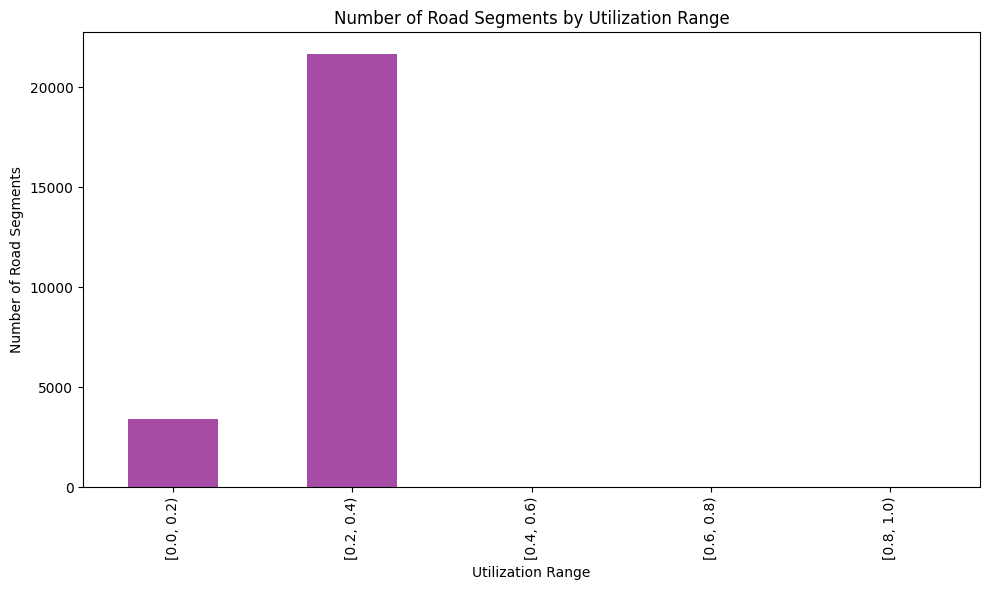

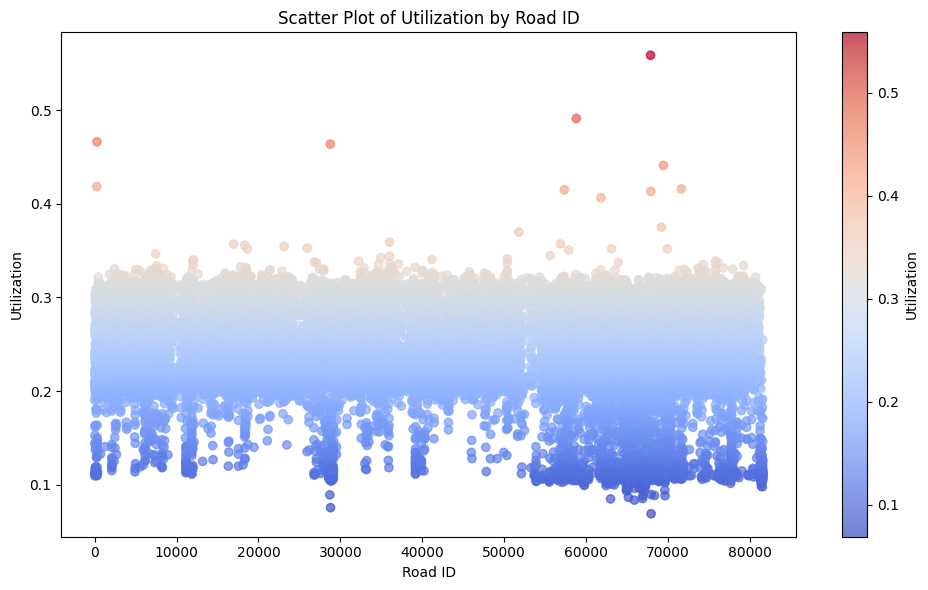

In [12]:
# Preparing data for different visualizations

# Combine high and low utilization data into a single DataFrame
road_utilization['category'] = 'Normal'  # Default category
road_utilization.loc[road_utilization['utilization'] >= high_threshold, 'category'] = 'High Utilization'
road_utilization.loc[road_utilization['utilization'] <= low_threshold, 'category'] = 'Low Utilization'


# 4. Bar Plot by Utilization Range
utilization_bins = pd.cut(road_utilization['utilization'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], right=False)
utilization_counts = utilization_bins.value_counts().sort_index()
plt.figure(figsize=(10, 6))
utilization_counts.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Number of Road Segments by Utilization Range')
plt.xlabel('Utilization Range')
plt.ylabel('Number of Road Segments')
plt.tight_layout()
plt.show()

# 5. Scatter Plot (Utilization vs. Road IDs)
plt.figure(figsize=(10, 6))
plt.scatter(road_utilization['road_id'], road_utilization['utilization'], c=road_utilization['utilization'], cmap='coolwarm', alpha=0.7)
plt.title('Scatter Plot of Utilization by Road ID')
plt.xlabel('Road ID')
plt.ylabel('Utilization')
plt.colorbar(label='Utilization')
plt.tight_layout()
plt.show()
